### Background
Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not.
Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular
behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the
readings were discarded if they seemed unreliable (out of range). The job is to develop a pre-processing pipeline
and a classifier, and also find out which subset of proteins is important in predicting which class.


### Importing libraries

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1

## Reading datasets

In [123]:
training_data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")

# Part 2

## Data analysis and visualization

In [124]:
display(training_data)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


#### Apart from 'Genotype' and 'Treatment_Behaviour' there are 77 columns (protiens) and 762 rows (mouse samples)

In [125]:
print(training_data.dtypes)

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


In [126]:
print(pd.unique(training_data.dtypes))

[dtype('float64') dtype('O')]


#### As observed 77 columns have 'float64' and 2 columns stated above have 'O' (object) data type

In [127]:
# All the column names are stored in protien variable
protiens = training_data.columns.values

#  Only protien names chunked from column names
protiens = protiens[0:77]
print(protiens)

['DYRK1A_N' 'ITSN1_N' 'BDNF_N' 'NR1_N' 'NR2A_N' 'pAKT_N' 'pBRAF_N'
 'pCAMKII_N' 'pCREB_N' 'pELK_N' 'pERK_N' 'pJNK_N' 'PKCA_N' 'pMEK_N'
 'pNR1_N' 'pNR2A_N' 'pNR2B_N' 'pPKCAB_N' 'pRSK_N' 'AKT_N' 'BRAF_N'
 'CAMKII_N' 'CREB_N' 'ELK_N' 'ERK_N' 'GSK3B_N' 'JNK_N' 'MEK_N' 'TRKA_N'
 'RSK_N' 'APP_N' 'Bcatenin_N' 'SOD1_N' 'MTOR_N' 'P38_N' 'pMTOR_N'
 'DSCR1_N' 'AMPKA_N' 'NR2B_N' 'pNUMB_N' 'RAPTOR_N' 'TIAM1_N' 'pP70S6_N'
 'NUMB_N' 'P70S6_N' 'pGSK3B_N' 'pPKCG_N' 'CDK5_N' 'S6_N' 'ADARB1_N'
 'AcetylH3K9_N' 'RRP1_N' 'BAX_N' 'ARC_N' 'ERBB4_N' 'nNOS_N' 'Tau_N'
 'GFAP_N' 'GluR3_N' 'GluR4_N' 'IL1B_N' 'P3525_N' 'pCASP9_N' 'PSD95_N'
 'SNCA_N' 'Ubiquitin_N' 'pGSK3B_Tyr216_N' 'SHH_N' 'BAD_N' 'BCL2_N' 'pS6_N'
 'pCFOS_N' 'SYP_N' 'H3AcK18_N' 'EGR1_N' 'H3MeK4_N' 'CaNA_N']


In [128]:
features = training_data[protiens].copy()
display(features)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197437,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


#### Finally the 'Genotype' data need to be predicted as output. Next, some analysis of the last two columns is done.

In [129]:
pd.unique(training_data['Genotype'])

array(['Control', 'Ts65Dn'], dtype=object)

In [130]:
pd.unique(training_data['Treatment_Behavior'])

array(['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C'],
      dtype=object)

In [131]:
for col in features.columns.values: # for each column
    unique_entries = pd.unique(features[col]) # unique elements in a column
    print(f"The column '{col}' has {len(unique_entries)} unique entries lying between {unique_entries.min()} and {unique_entries.max()}; no. of NaN values: {features[col].isnull().sum()}")

The column 'DYRK1A_N' has 762 unique entries lying between 0.17063403800000002 and 2.516367377; no. of NaN values: 0
The column 'ITSN1_N' has 761 unique entries lying between 0.264085228 and 2.602662135; no. of NaN values: 0
The column 'BDNF_N' has 762 unique entries lying between 0.19415956899999998 and 0.497159859; no. of NaN values: 0
The column 'NR1_N' has 762 unique entries lying between 1.414913958 and 3.7576413310000003; no. of NaN values: 0
The column 'NR2A_N' has 762 unique entries lying between 1.7947157999999999 and 8.482553422; no. of NaN values: 0
The column 'pAKT_N' has 762 unique entries lying between 0.063236006 and 0.43462381299999997; no. of NaN values: 0
The column 'pBRAF_N' has 760 unique entries lying between 0.064042588 and 0.317065589; no. of NaN values: 0
The column 'pCAMKII_N' has 762 unique entries lying between 1.369897959 and 6.9472904579999994; no. of NaN values: 0
The column 'pCREB_N' has 762 unique entries lying between 0.112811791 and 0.306247231; no. of

#### The number of unique entries is mostly 762 with deviations for few columns. The values lie between varied ranges and a lot of columns have huge number of NaN values

# Part 3

## Multivariable Imputation

In [132]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Multivariate imputation is performed below
imputer = IterativeImputer(max_iter = 30, random_state = 0)

imputer.fit(features)

imputed_features = pd.DataFrame(imputer.transform(np.array(features)))
display(imputed_features)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197437,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [133]:
imputed_features.columns = protiens
display(imputed_features)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197437,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


#### Histograms

In [134]:
# The given function prints column histograms with range on X axis and number of samples on Y axis
def histograms(df):
    count = 1
    for col in df.columns.values:
        plt.hist(df[col])
        plt.xlabel(col)
        plt.ylabel("counts")  
        count +=1
        plt.show()

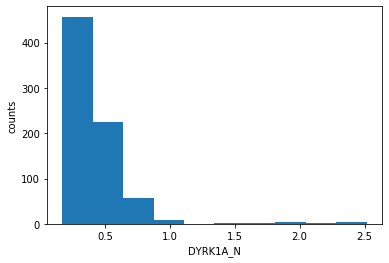

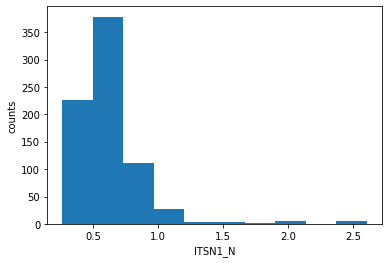

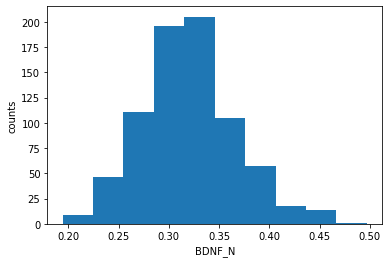

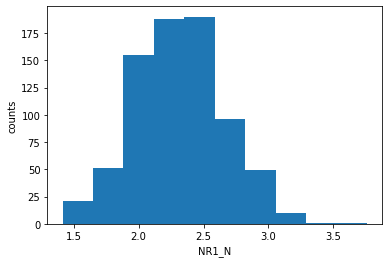

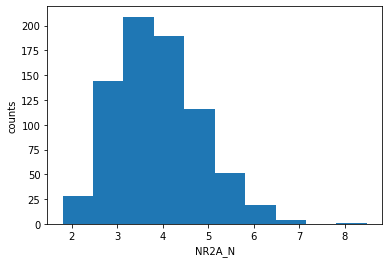

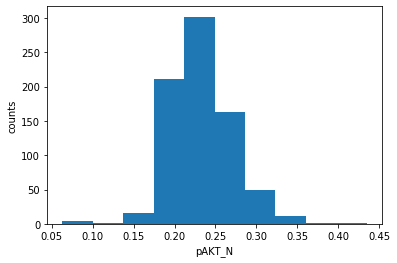

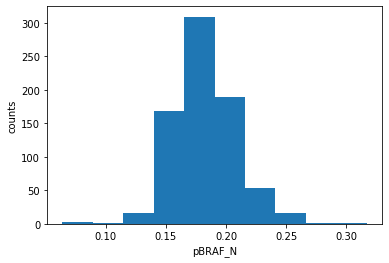

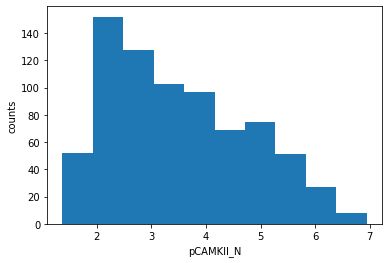

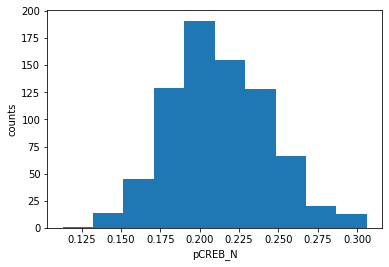

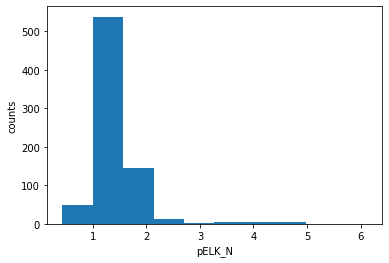

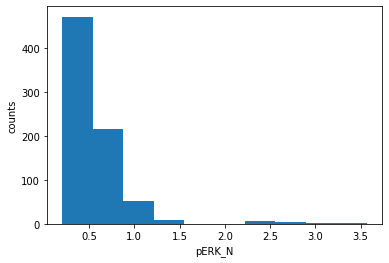

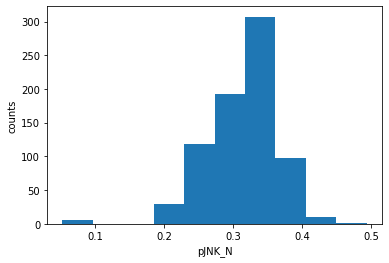

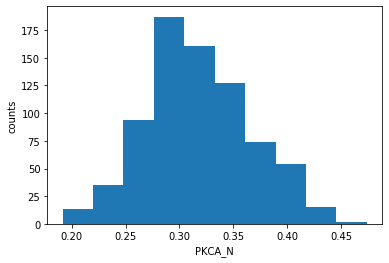

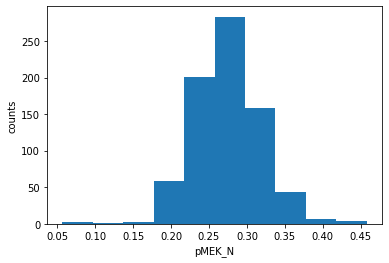

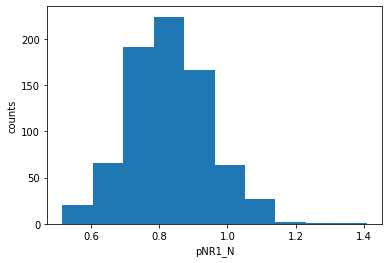

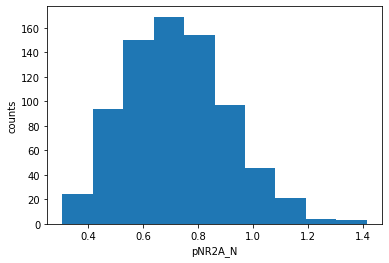

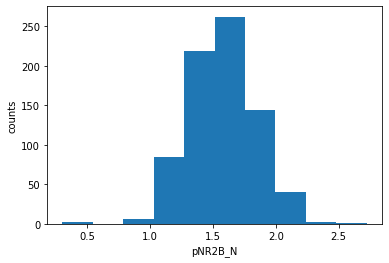

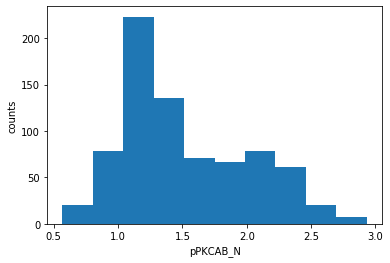

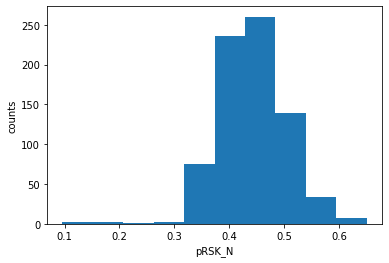

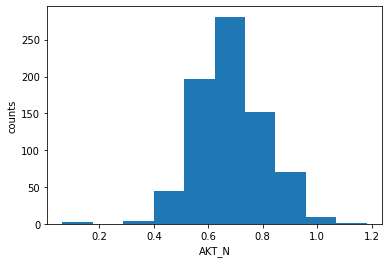

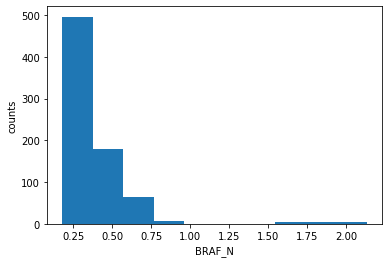

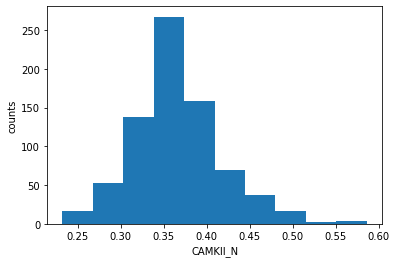

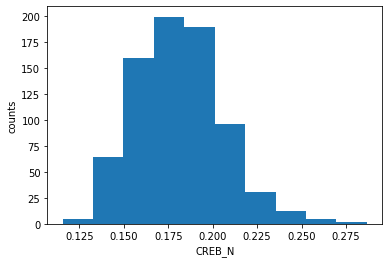

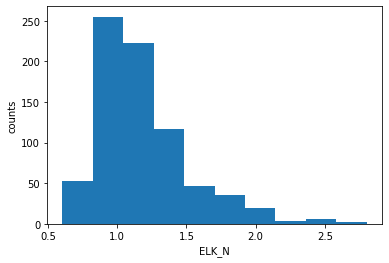

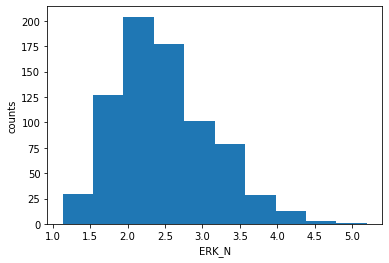

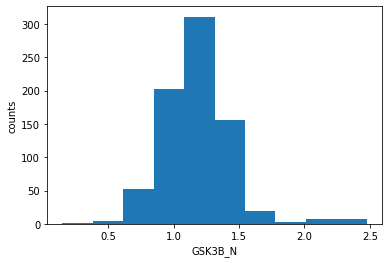

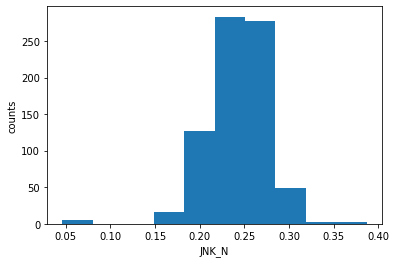

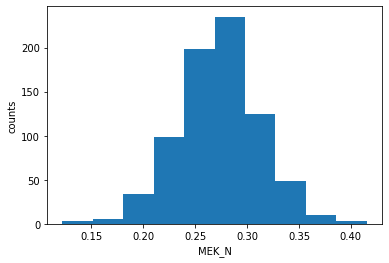

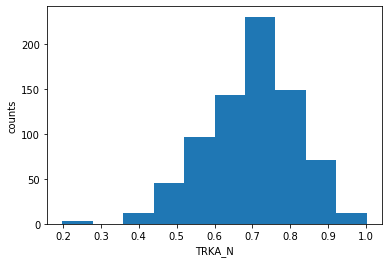

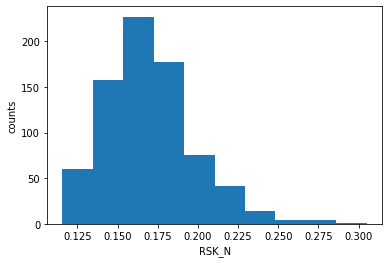

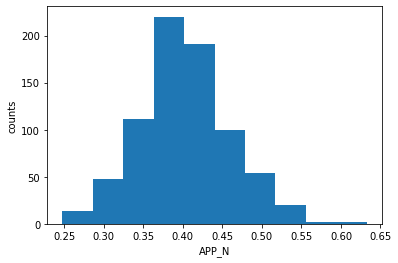

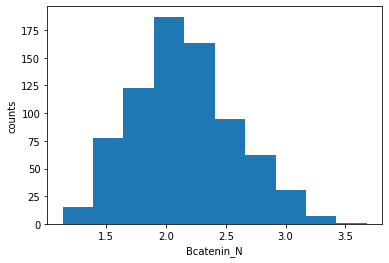

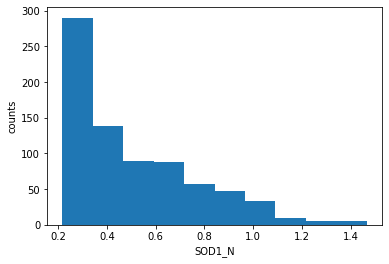

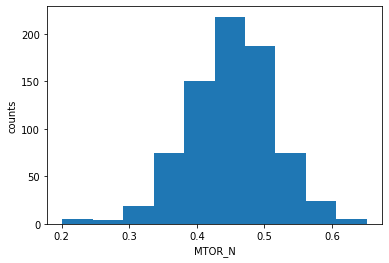

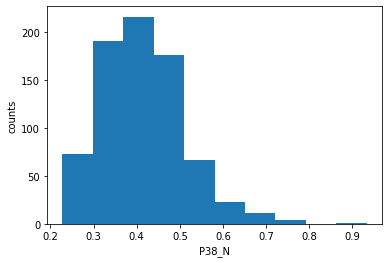

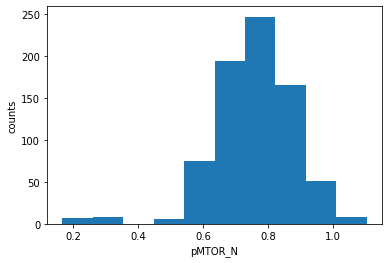

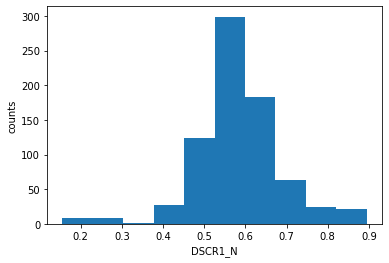

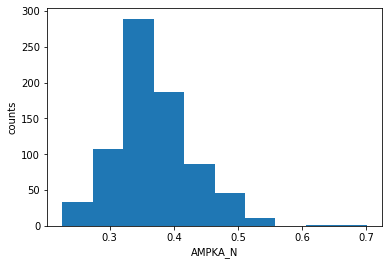

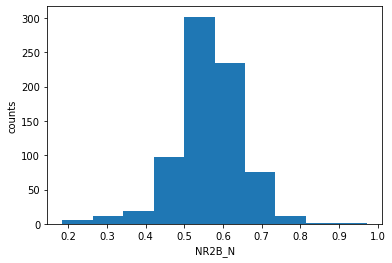

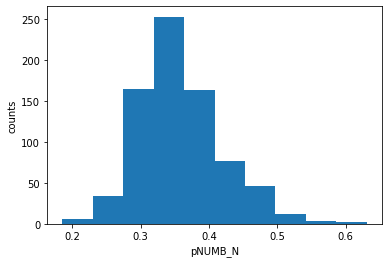

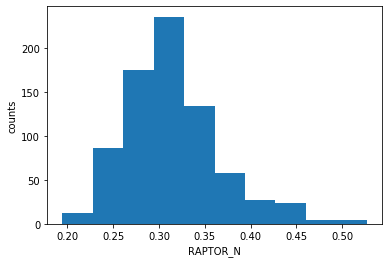

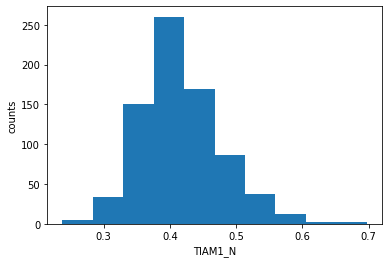

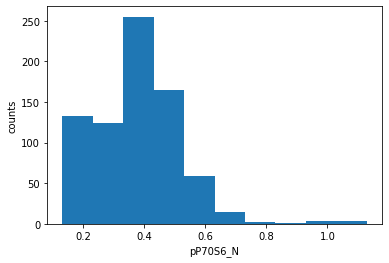

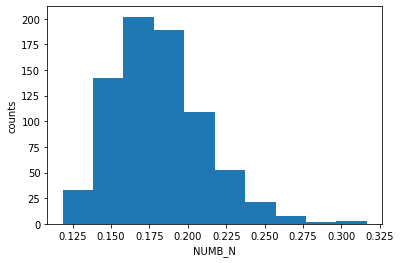

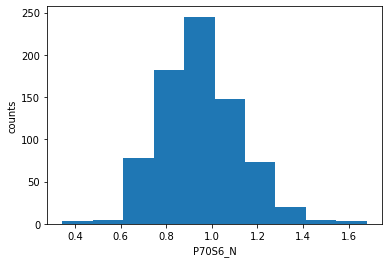

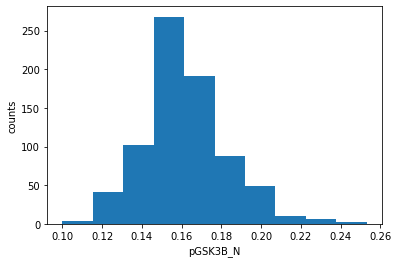

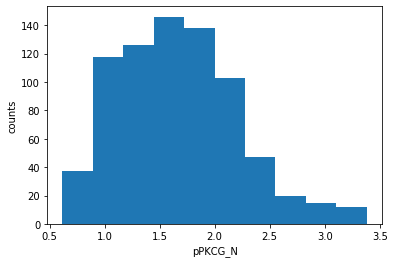

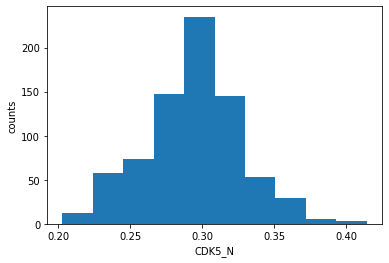

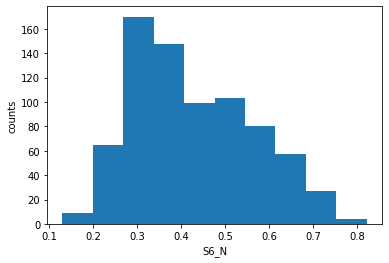

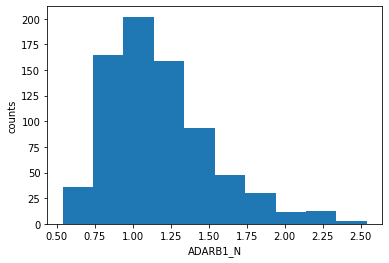

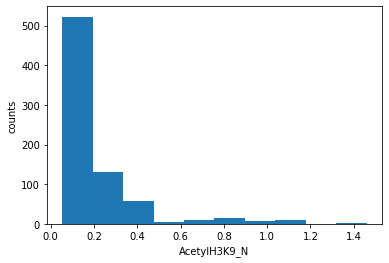

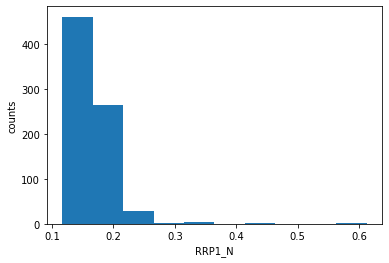

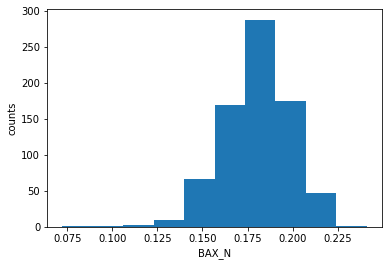

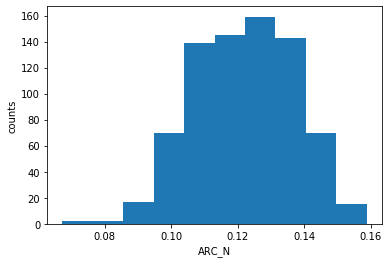

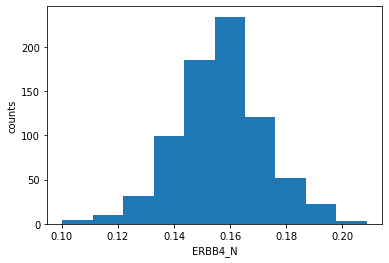

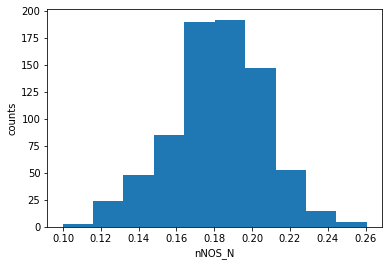

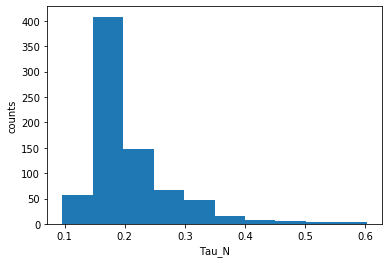

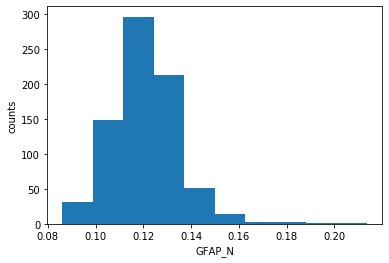

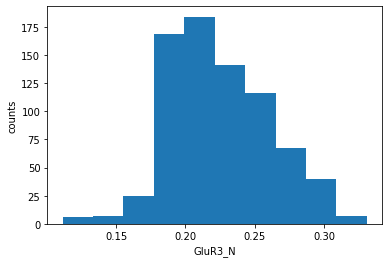

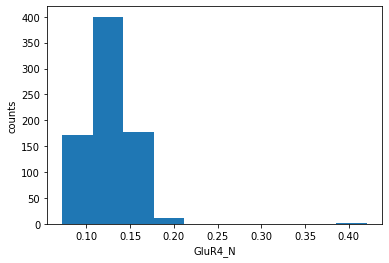

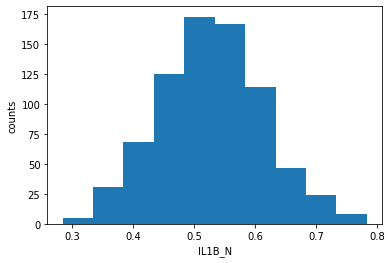

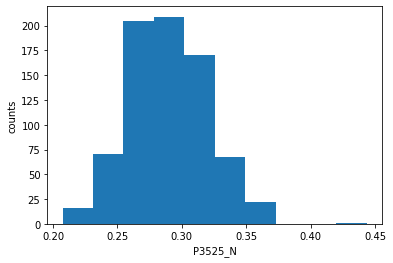

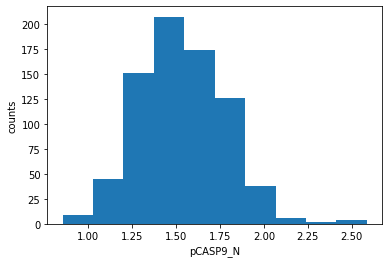

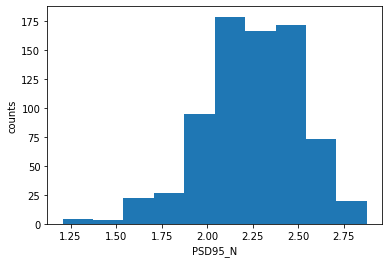

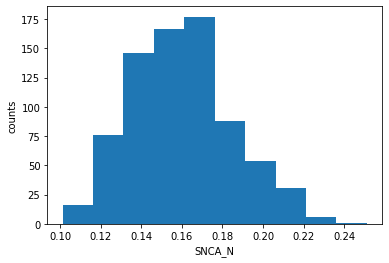

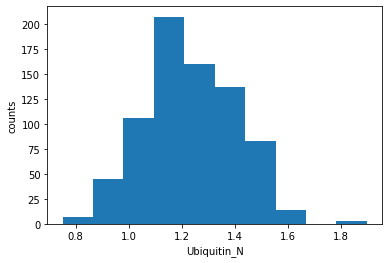

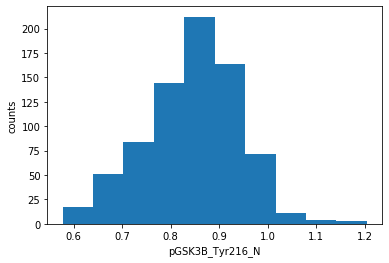

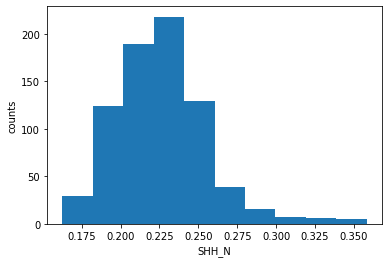

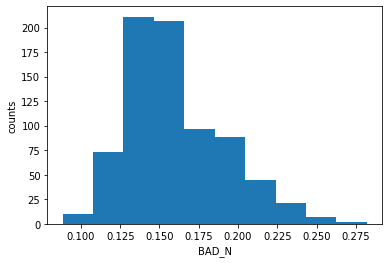

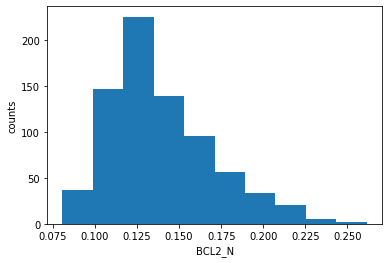

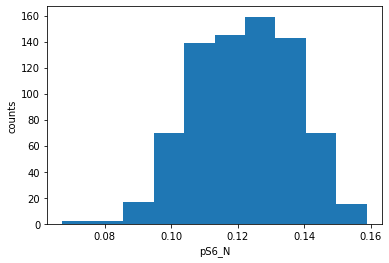

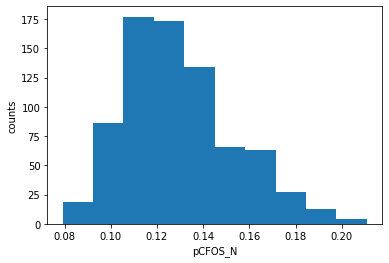

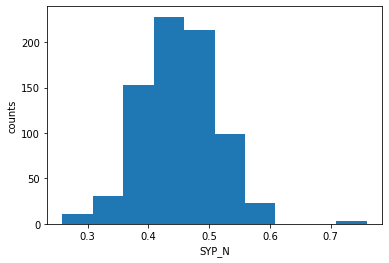

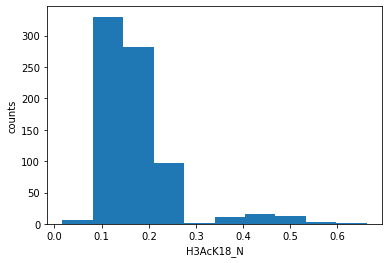

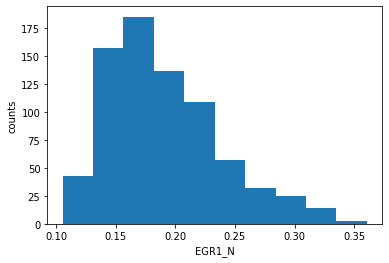

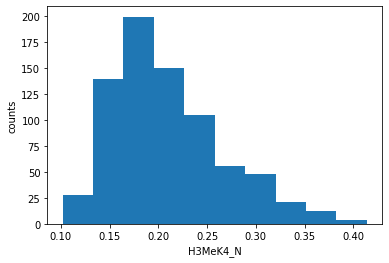

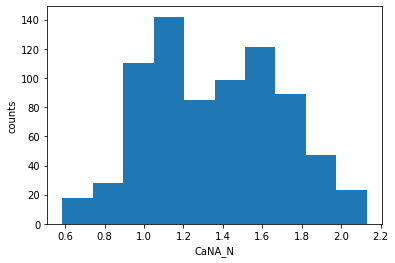

In [135]:
histograms(imputed_features)

#### Almost all the features have Gaussian like distribution

#### Scatter plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CF5E5C388>,
      dtype=object)

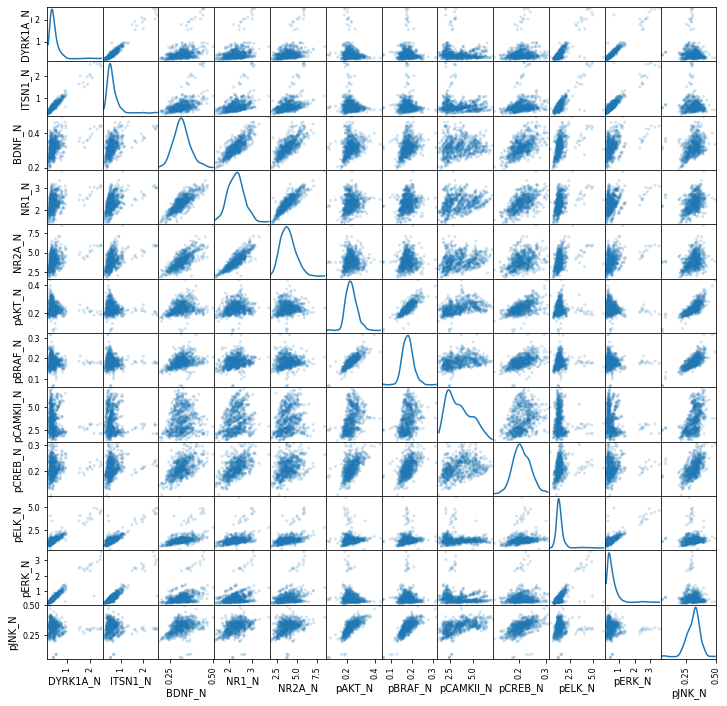

In [136]:
# Number of features to be plotted = n
n = 12
pd.plotting.scatter_matrix(imputed_features[protiens[0:n]], alpha = 0.2, figsize=(n, n), diagonal = 'kde')

#### Correlation matrix (for n protiens)

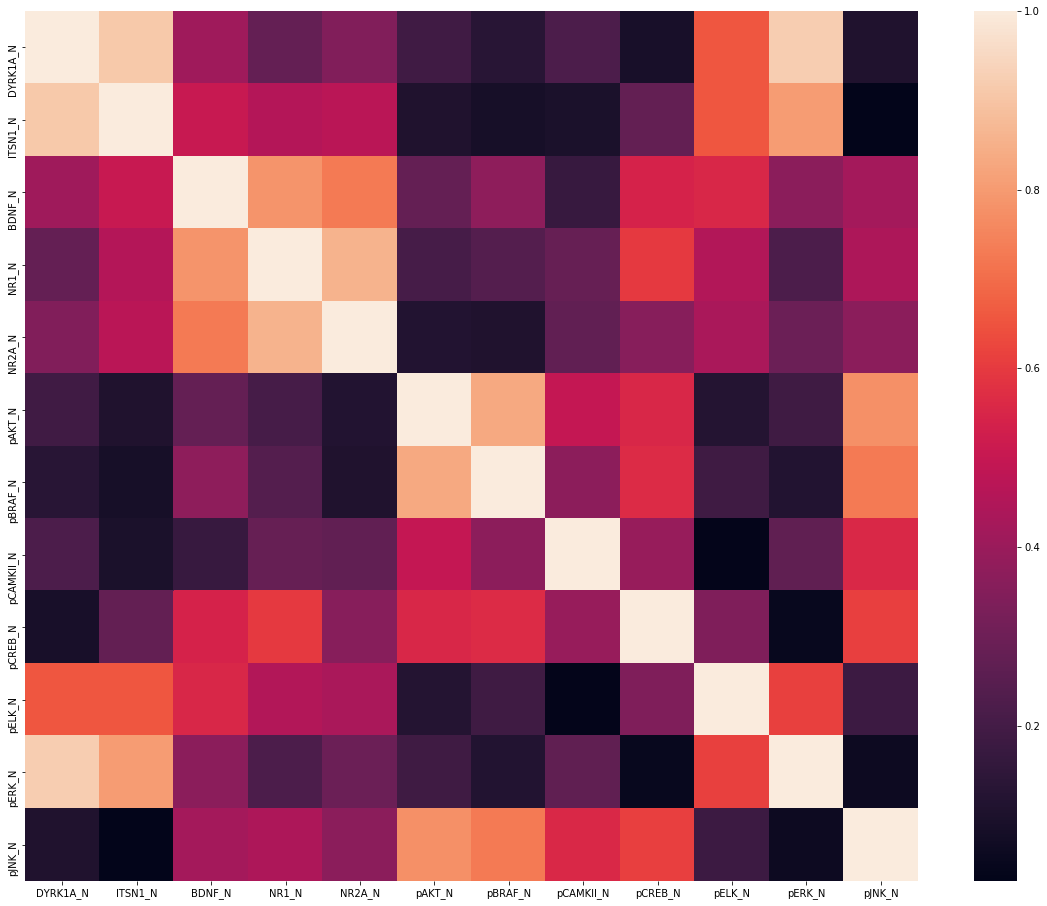

In [137]:
corrmat_n = imputed_features[protiens[0:n]].corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrmat_n), annot=False)
plt.show()

#### Correlation matrix

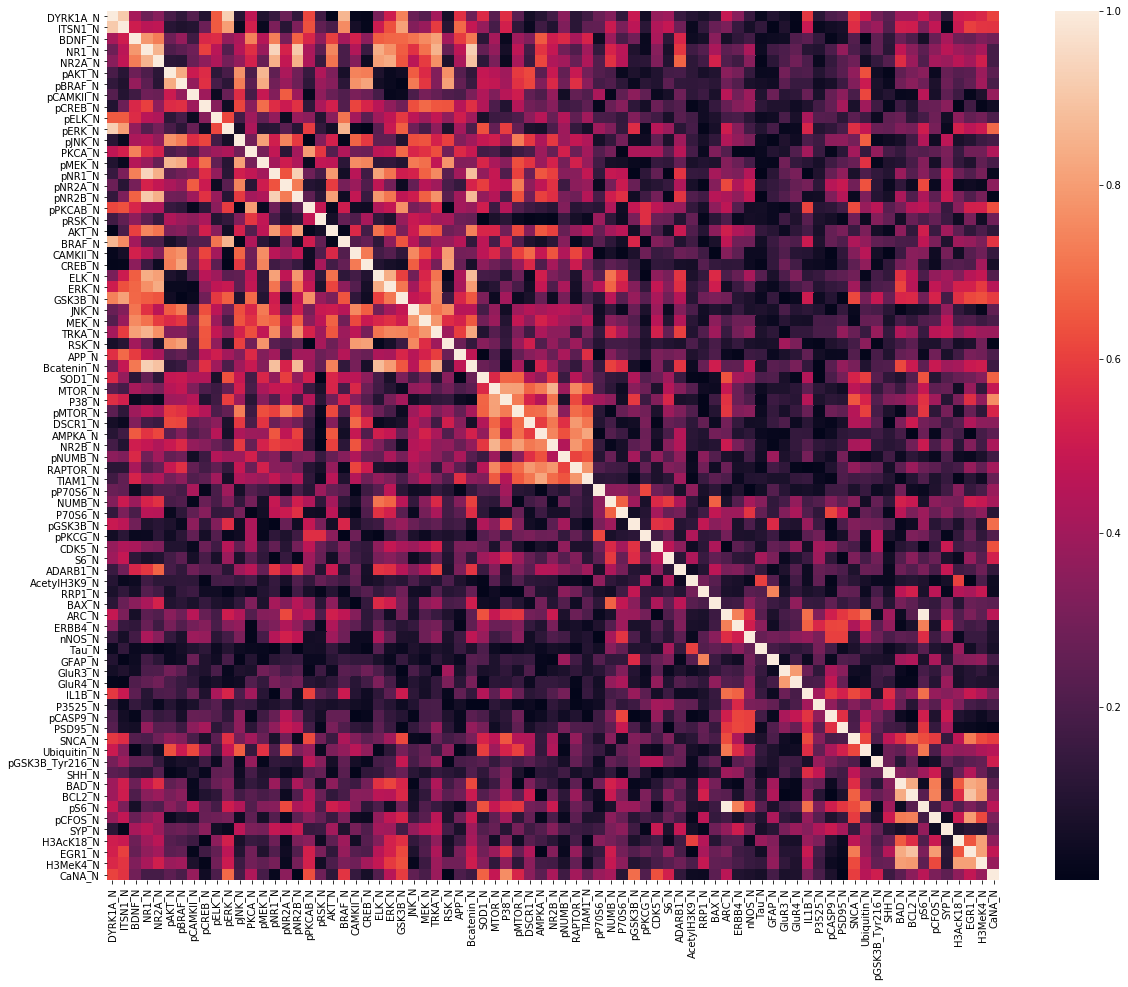

In [138]:
corrmat = imputed_features.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrmat), annot=False)
plt.show()

#### From histograms and correlation matrix we can see the correlation between different columns. The scatter plots with spread around x=y line like - (NR1_N,NR2A_N), (DYRK1A_N,pERK_N) etc and lighter blocks in the correlation matrix show significant correlations

In [139]:
# Instead of unique names each type of genotype is given a number for data interpretation
elements_genotype = pd.unique(training_data['Genotype'])
encode_genotype = np.linspace(1, len(elements_genotype), num=len(elements_genotype))
print(elements_genotype)
print(encode_genotype)

['Control' 'Ts65Dn']
[1. 2.]


In [140]:
# Declaring a dataframe 'column_genotype' with only genotype data
column_genotype = pd.DataFrame(training_data['Genotype'])

# Encoding every row of column_genotype 
y_encoded = column_genotype.replace(elements_genotype, encode_genotype)

In [141]:
# Just for the sake of convinience
X = imputed_features.copy()
y = y_encoded

display(X)
display(y)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197437,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


,Genotype
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
757,2.0
758,2.0
759,2.0
760,2.0


# Part 4 & 5
## Selection of metrics and model training

In [142]:
from sklearn.model_selection import train_test_split

# Splitting data into training and test for checking accuracy of various models
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
train_y = np.squeeze(train_y)
test_y = np.squeeze(test_y)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(609, 77)
(609,)
(153, 77)
(153,)


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)

# Normalization of data
train_X_norm = pd.DataFrame( scaler.transform(train_X) )
test_X_norm = pd.DataFrame( scaler.transform(test_X) ) 

display(train_X_norm)
display(test_X_norm)

print(train_X_norm.mean())
print(test_X_norm.mean())

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.324782,0.243334,0.095686,-0.505988,-0.490749,0.943136,0.736236,0.812811,-0.231292,0.301176,...,0.522031,-0.478265,-0.531439,-0.682054,-1.248179,-0.355280,-0.578041,-0.790493,-0.484677,0.288830
1,0.160399,0.185611,0.966771,0.676724,0.810319,-1.256257,-2.449413,-0.499144,-0.338684,0.123814,...,0.256671,-0.741466,-0.601757,-0.368092,-0.556561,0.013083,-0.671655,-0.591803,-1.127398,0.484508
2,-0.327307,-0.283871,-0.777719,-0.653736,-0.774298,-0.434403,-0.613856,0.419130,-1.126375,-0.456412,...,0.343747,-0.826592,-0.512254,-0.491255,-0.045907,-1.171334,-0.543619,-0.096006,-0.687042,-1.071792
3,-0.882724,-0.826202,-1.162709,-0.200592,-0.883093,1.351311,-0.508714,0.633696,1.099752,-0.047695,...,-0.742149,3.029337,2.025300,0.730759,0.934074,1.563746,0.957804,1.820424,2.197030,-0.622245
4,0.311665,0.637446,1.025786,1.519546,1.075535,-0.676196,-0.540463,-0.306622,1.357607,0.071577,...,0.150257,-0.503761,-0.636068,-0.384715,0.076616,0.808249,-0.410320,-0.951049,-1.245964,1.307715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,1.602297,1.565824,0.381270,-0.052798,0.486580,-1.496700,-1.076296,-1.319663,-0.053438,1.384207,...,-0.576518,-1.950727,-1.513627,-0.366685,-1.632353,-1.982980,-1.130906,-1.570764,-1.835470,0.427856
605,-0.555451,-1.104626,-1.172521,-1.433998,-1.388065,-1.074594,-0.153114,-0.244108,-0.930470,-0.253946,...,0.089169,3.875632,2.610524,0.369675,2.808588,-0.645873,0.947315,2.667808,0.916993,-1.956367
606,-0.422001,-0.432624,-0.107797,-0.321686,-0.794410,2.265752,0.608539,0.623012,1.058874,0.370027,...,-0.297915,0.275294,1.113419,1.471717,-0.190603,-0.085811,-0.065289,0.294596,0.795770,-0.422032
607,-0.503686,-0.437839,1.042079,0.345276,0.048826,0.475750,0.948631,-0.356009,0.764342,-0.062004,...,-0.806497,0.216893,0.284171,-0.188310,0.212891,-1.239249,2.631433,0.572158,1.494395,-1.896064


,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.376933,-0.301191,-0.938749,0.183301,-0.260925,0.903670,-0.118318,1.023766,0.834217,0.135031,...,-0.879495,-0.828501,-0.907813,0.952889,-1.020263,-0.873562,-0.588323,-0.835478,-0.465887,-0.648762
1,-0.277785,-0.309222,0.185320,0.640203,0.636023,-0.013256,0.307249,-0.309189,-0.235917,-0.018691,...,-0.271722,-0.665098,-0.433117,1.342054,-0.429529,0.407329,-0.540792,-0.349129,-0.330393,-0.755731
2,-0.045434,-0.137987,0.513746,0.447973,0.642841,0.098872,0.109783,0.202395,-0.609202,-0.336964,...,-0.416268,0.200244,-0.585437,-0.246173,-0.892735,0.778593,-0.597727,-0.609193,-0.699253,1.728664
3,-0.218979,-0.142531,0.364047,0.475665,0.376308,0.426933,0.913069,-0.694373,-0.298490,-0.311480,...,1.215970,0.377557,0.790701,0.413023,0.919749,0.937729,-0.179948,0.515244,0.403112,1.060178
4,4.866054,3.146634,-0.099253,-0.330049,0.251245,-0.865676,-0.500772,-0.816750,-0.883886,3.226959,...,-1.040919,-0.601964,-0.434857,-1.128862,-0.674027,0.369082,-0.741444,-0.594369,-0.042261,1.965575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-0.411142,-0.480947,-1.333614,-1.076128,-1.192573,-0.926645,-1.389709,-1.119269,-1.724003,-0.719542,...,-0.168723,-0.649919,-0.743411,-1.817179,0.098324,-1.586032,-0.393144,0.244929,-0.652375,0.621723
149,-0.096796,-0.137059,0.480578,0.443182,0.734669,0.125377,0.109718,0.294804,-0.118111,-0.471069,...,-0.387935,-0.154703,-0.386139,-0.277081,-0.991361,0.819638,-0.615824,-0.665280,-0.708635,1.688984
150,0.760541,0.600400,0.138979,-0.102594,-0.888079,0.754867,1.373121,1.275420,0.132463,0.250830,...,-0.150216,1.409789,0.008762,-1.178358,0.142486,0.263539,0.346109,0.621332,0.369377,0.387842
151,1.531234,1.471426,1.213034,0.681839,0.708657,-0.224071,-0.041631,-0.822281,0.318007,0.982174,...,-1.319036,-1.197905,-1.399736,-0.970650,-1.248863,0.238004,-1.008723,-1.316428,-1.379545,1.978432


0     7.178166e-17
1     7.050554e-17
2    -2.812018e-17
3     7.868182e-16
4    -3.328846e-16
          ...     
72   -5.762586e-16
73    1.996214e-17
74   -3.552167e-16
75   -1.889795e-16
76   -4.885711e-17
Length: 77, dtype: float64
0    -0.087722
1    -0.119478
2    -0.253583
3    -0.212491
4    -0.143398
        ...   
72   -0.041476
73    0.118185
74    0.092364
75    0.124890
76    0.013088
Length: 77, dtype: float64


#### Training data mean is 0 while test data mean is close to 0 but not exactly 0

## Training, Validation and Testing

In [144]:
# The function below fits the model to training data and performs predictions on test data
# As a metric ROC-AUC score is chosen to check the accuracy of model
def grid_search_results(model, hyper_params, scoring, train_X, train_y, test_X, test_y):
    
    # perform 5 fold cross validation over alpha=0.1, 0.5
    clf = GridSearchCV(estimator = model, param_grid = hyper_params, scoring=scoring, cv=5)  
    
    clf.fit(train_X, train_y)
    print(f"Best parameters: \n {clf.best_params_}")
    print(f"Best score: {str(clf.best_score_)}")
    y_predict = clf.predict(test_X)
    print(f"Classification report: \n {classification_report(test_y, y_predict)}")
    print(f"Test ROC-AUC Score: {str(roc_auc_score(test_y, y_predict))}")

In [145]:
# Returns the fitted model and gives a classification report
def trained_model(model, train_X, train_y, test_X, test_y, metric_for_test):
    model.fit(train_X, train_y)
    y_predict = model.predict(test_X)
    performance = metric_for_test(test_y, y_predict)
    return model, performance

### L1 Regularisation ( Just for test run)
##### This is not a part of assignment. It was done to test if the functions are working fine

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
score_L1 = 'f1'

hyperparameters_L1 = {'C':[0.01, 0.1, 1, 10, 100, 500]}
grid_search_results(LogisticRegression(penalty='l1', solver = 'liblinear'), hyperparameters_L1, score_L1, train_X_norm, np.squeeze(train_y), test_X_norm, np.squeeze(test_y))

model1_L1, performance_model1 = trained_model(LogisticRegression(penalty='l1', solver = 'liblinear', C = 1), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
model2_L1, performance_model2 = trained_model(LogisticRegression(penalty='l1', solver = 'liblinear', C=0.01), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"model 1 of Logistic Regression with L1 weight and with C=1 has ROC-AUC score:{performance_model1}")
print(f"model 2 of Logistic Regression with L1 weight and with C=0.01 has ROC-AUC score:{performance_model2}")

Best parameters: 
 {'C': 100}
Best score: 0.9796847239926851
Classification report: 
               precision    recall  f1-score   support

         1.0       0.97      0.99      0.98        91
         2.0       0.98      0.95      0.97        62

    accuracy                           0.97       153
   macro avg       0.98      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153

Test ROC-AUC Score: 0.9703119461183978
model 1 of Logistic Regression with L1 weight and with C=1 has ROC-AUC score:0.9728819567529244
model 2 of Logistic Regression with L1 weight and with C=0.01 has ROC-AUC score:0.7020560085076214


#### Clearly model 1 with C=1 performs better than model with C=0.01

In [147]:
print("Number of features which were given 0 weight: ",len(np.argwhere(np.squeeze(model1_L1.coef_)==0)))

Number of features which were given 0 weight:  33


#### Thus we see a large number of features are eliminated due to L1 regularization

### L2 Regularization (Just for test run)
##### This is not a part of assignment. It was done to test if the functions are working fine

In [148]:
hyperparameters_L2 = {'C':[0.01, 0.1, 1, 10, 50, 100, 500]}
scoring_L2 = 'f1'

grid_search_results(LogisticRegression(penalty='l2', solver='liblinear'), hyperparameters_L2, scoring_L2, train_X_norm, train_y, test_X_norm, test_y)

model1_L2, performance_model1_L2 = trained_model(LogisticRegression(penalty='l2', solver = 'liblinear', C = 1), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
model2_L2, performance_model2_L2 = trained_model(LogisticRegression(penalty='l2', solver = 'liblinear', C=50), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of Logistic Regression with L2 weight and with C=1 has ROC-AUC score:{performance_model1_L2}")
print(f"Model 2 of Logistic Regression with L2 weight and with C=50 has ROC-AUC score:{performance_model2_L2}")

Best parameters: 
 {'C': 10}
Best score: 0.9739910906187337
Classification report: 
               precision    recall  f1-score   support

         1.0       0.96      0.99      0.97        91
         2.0       0.98      0.94      0.96        62

    accuracy                           0.97       153
   macro avg       0.97      0.96      0.97       153
weighted avg       0.97      0.97      0.97       153

Test ROC-AUC Score: 0.9622474299893655
Model 1 of Logistic Regression with L2 weight and with C=1 has ROC-AUC score:0.9648174406238923
Model 2 of Logistic Regression with L2 weight and with C=50 has ROC-AUC score:0.9703119461183978


#### Here, the model with C=10 gives the best score

### Elastic Net Logistic Regression

In [150]:
from sklearn.linear_model import SGDClassifier

hyperparameters_EN = {'l1_ratio': [0.15, 0.35, 0.5, 0.75, 0.95]}
scoring_EN = 'f1'
grid_search_results(SGDClassifier(loss='log',penalty='elasticnet'), hyperparameters_EN, scoring_EN, train_X_norm, train_y, test_X_norm, test_y)

model1_EN, performance_model1_EN = trained_model(SGDClassifier(loss='log',penalty='elasticnet',l1_ratio=0.5), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
model2_EN, performance_model2_EN = trained_model(SGDClassifier(loss='log',penalty='elasticnet',l1_ratio=0.15), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of Elastic net with l1:l2 ratio = 0.5 has ROC-AUC score:{performance_model1_EN}")
print(f"Model 2 of Elastic net with l1:l2 ratio = 0.15 has ROC-AUC score:{performance_model2_EN}")

Best parameters: 
 {'l1_ratio': 0.5}
Best score: 0.9580177184505579
Classification report: 
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.96        91
         2.0       0.97      0.92      0.94        62

    accuracy                           0.95       153
   macro avg       0.96      0.95      0.95       153
weighted avg       0.95      0.95      0.95       153

Test ROC-AUC Score: 0.9486884083658277
Model 1 of Elastic net with l1:l2 ratio = 0.5 has ROC-AUC score:0.9351293867422901
Model 2 of Elastic net with l1:l2 ratio = 0.15 has ROC-AUC score:0.9512584190003545


#### It was observed that the best score as well as the performance with different hyperparameters keeps on changing with elastic net. Still the best score lies somewhere around 0.96. Running this cell multiple times will give different l1:l2 ratio for best score every time.

### Nueral Network

In [151]:
from sklearn.neural_network import MLPClassifier

hyperparameters_NN = {'hidden_layer_sizes': [(5,),(10,),(20,),(50,),(100,)]}
scoring_NN = 'f1'
grid_search_results(MLPClassifier(random_state=1, max_iter=300, solver='lbfgs'), hyperparameters_NN, scoring_NN, train_X_norm, train_y, test_X_norm, test_y)

model1_NN, performance_model1_NN = trained_model(MLPClassifier(random_state=1, max_iter=300, solver='lbfgs', hidden_layer_sizes=(50,)), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
model2_NN, performance_model2_NN = trained_model(MLPClassifier(random_state=1, max_iter=300, solver='lbfgs', hidden_layer_sizes=(5,)), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of Random Forest Classifier with hidden layer size=50 has ROC-AUC score:{performance_model1_NN}")
print(f"Model 2 of Random Forest Classifier with hidden layer size=5 has ROC-AUC score:{performance_model2_NN}")

Best parameters: 
 {'hidden_layer_sizes': (20,)}
Best score: 0.9912399424024294
Classification report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        91
         2.0       1.00      1.00      1.00        62

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

Test ROC-AUC Score: 1.0
Model 1 of Random Forest Classifier with hidden layer size=50 has ROC-AUC score:0.9945054945054945
Model 2 of Random Forest Classifier with hidden layer size=5 has ROC-AUC score:0.9864409783764623


#### The best score is for a hidden layer with size 20

### SVM

In [48]:
from sklearn.svm import SVC

hyperparameters_SVM = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.01, 0.1, 1, 10, 100, 500]}
scoring_SVM = 'f1'
grid_search_results(SVC(), hyperparameters_SVM, scoring_SVM, train_X_norm, train_y, test_X_norm, test_y)

model1_SVM, performance_model1_SVM = trained_model(SVC(kernel='linear', C=10), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
model2_SVM, performance_model2_SVM = trained_model(SVC(kernel='rbf', C=0.01), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of SVM with linear kernel and C=10 has ROC-AUC score:{performance_model1_SVM}")
print(f"Model 2 of SVM with rbf kernel and C=1 has ROC-AUC score:{performance_model2_SVM}")

Best parameters: 
 {'C': 10, 'kernel': 'rbf'}
Best score: 0.9985185185185186
Classification report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        91
         2.0       1.00      1.00      1.00        62

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

Test ROC-AUC Score: 1.0
Model 1 of SVM with linear kernel and C=10 has ROC-AUC score:0.9728819567529244
Model 2 of SVM with rbf kernel and C=1 has ROC-AUC score:0.5


#### Best parameters for SVM are 'rbf' kernel and regularization parameter C=10. We can also see that for C=1 the accuracy is very low.

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

hyperparameters_RF = {'max_depth': [1, 5,10, 20, 50, 100], 'n_estimators':[10, 50, 100, 200]}
scoring_RF = 'f1'
grid_search_results(RandomForestClassifier(), hyperparameters_RF, scoring_RF, train_X_norm, train_y, test_X_norm, test_y)

model1_RF, performance_model1_RF = trained_model(RandomForestClassifier(max_depth = 100, n_estimators=200), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)
model2_RF, performance_model2_RF = trained_model(RandomForestClassifier(max_depth = 50, n_estimators = 10), train_X_norm, train_y, test_X_norm, test_y, roc_auc_score)

print(f"Model 1 of Random Forest Classifier with max depth=100, n_estimators=200 has ROC-AUC score:{performance_model1_RF}")
print(f"Model 2 of Random Forest Classifier with max_depth=50, n_estimators=10 has ROC-AUC score:{performance_model2_RF}")

Best parameters: 
 {'max_depth': 20, 'n_estimators': 200}
Best score: 0.9871716546804548
Classification report: 
               precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        91
         2.0       1.00      0.95      0.98        62

    accuracy                           0.98       153
   macro avg       0.98      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153

Test ROC-AUC Score: 0.9758064516129032
Model 1 of Random Forest Classifier with max depth=100, n_estimators=200 has ROC-AUC score:0.9838709677419355
Model 2 of Random Forest Classifier with max_depth=50, n_estimators=10 has ROC-AUC score:0.9622474299893655


#### Here, the model with max depth = 20 and number of estimators = 100 gives the best score

# Part 6

## Feature Importance

### Elastic Net Logistic Regression

Feature: 0, Score: 5.621522397436379
Feature: 1, Score: 51.92357738337791
Feature: 2, Score: -6.911794940335912
Feature: 3, Score: -14.660008432193395
Feature: 4, Score: -10.578067525990765
Feature: 5, Score: 17.060974550845575
Feature: 6, Score: -6.033521095465158
Feature: 7, Score: -21.238715535875695
Feature: 8, Score: 17.37151915997532
Feature: 9, Score: -2.7105224560202696
Feature: 10, Score: -13.359437326955451
Feature: 11, Score: 4.210167657457266
Feature: 12, Score: 19.127014620037954
Feature: 13, Score: 4.76174031946269
Feature: 14, Score: -28.261097674206233
Feature: 15, Score: 12.71902622359846
Feature: 16, Score: 6.941537042907417
Feature: 17, Score: -0.616760552243228
Feature: 18, Score: -11.18695995246088
Feature: 19, Score: 2.101488174519677
Feature: 20, Score: -17.574147352740432
Feature: 21, Score: -14.268717367097542
Feature: 22, Score: -15.100421983405072
Feature: 23, Score: -15.707529079110383
Feature: 24, Score: -34.054584529743934
Feature: 25, Score: 12.4986798075

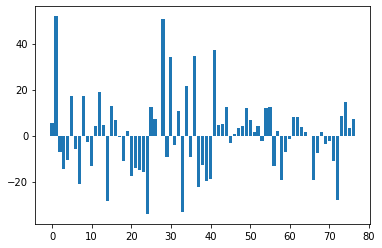

In [73]:
importance_EN = model1_EN.coef_[0]
# summarize feature importance
for i,v in enumerate(importance_EN):
    print(f'Feature: {i}, Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance_EN))], importance_EN)
plt.show()

#### 2nd and 27th feature (protien) are appearing to have more importance than other features. Also some features like 25th or 32th are making the loss shoot up which means the model is not making very good use of these features. Others like 18th and 45th have neither positive nor negative contribution

### SVM
For SVM feature importance can only be checked for linear kernel. For other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space.
Source: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

Feature: 0, Score: 0.4921421734720426
Feature: 1, Score: 4.314471891034526
Feature: 2, Score: 0.4054721431366077
Feature: 3, Score: -0.5424378798615331
Feature: 4, Score: 0.19577252974225412
Feature: 5, Score: 1.0711068023701553
Feature: 6, Score: -0.20743561176377814
Feature: 7, Score: -1.067158163995462
Feature: 8, Score: 0.19272548593583474
Feature: 9, Score: -0.7911680422312941
Feature: 10, Score: -1.9653245884595618
Feature: 11, Score: -0.11374981551269056
Feature: 12, Score: 1.313396613647247
Feature: 13, Score: 0.08931543954685138
Feature: 14, Score: -1.2293854170204415
Feature: 15, Score: 1.0740048666523583
Feature: 16, Score: -0.48647163183465186
Feature: 17, Score: -0.13531972509246265
Feature: 18, Score: -0.7143878262920658
Feature: 19, Score: 0.07732255633983426
Feature: 20, Score: -1.4419343100892323
Feature: 21, Score: -0.6470560551994016
Feature: 22, Score: -0.3131413111486577
Feature: 23, Score: -0.6651204295559213
Feature: 24, Score: -2.808660220607852
Feature: 25, Sco

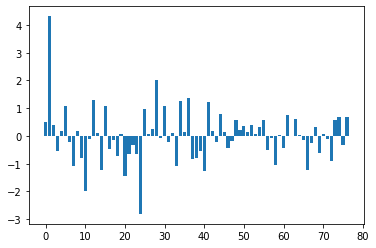

In [78]:
importance_SVM = model1_SVM.coef_[0]
# summarize feature importance
for i,v in enumerate(importance_SVM):
    print(f'Feature: {i}, Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance_SVM))], importance_SVM)
plt.show()

#### Here also 2nd feature is very important and 25th feature has huge loss contribution.

### Random Forest

Feature: 0, Score: 0.017869623071176434
Feature: 1, Score: 0.05913348529957958
Feature: 2, Score: 0.007308377144640695
Feature: 3, Score: 0.008980765681810523
Feature: 4, Score: 0.008434509659364327
Feature: 5, Score: 0.012445385529503887
Feature: 6, Score: 0.004435844985628987
Feature: 7, Score: 0.011145962778591478
Feature: 8, Score: 0.014292557200817547
Feature: 9, Score: 0.009539331927392933
Feature: 10, Score: 0.008998266200517198
Feature: 11, Score: 0.006220535037458255
Feature: 12, Score: 0.005773601180670953
Feature: 13, Score: 0.006643651167049873
Feature: 14, Score: 0.010908549808027447
Feature: 15, Score: 0.00851177936915966
Feature: 16, Score: 0.005617899846148101
Feature: 17, Score: 0.00970303520444198
Feature: 18, Score: 0.012052716788168608
Feature: 19, Score: 0.008382649157297329
Feature: 20, Score: 0.01756964952822842
Feature: 21, Score: 0.006975409049158531
Feature: 22, Score: 0.0103919765883447
Feature: 23, Score: 0.00892157919498399
Feature: 24, Score: 0.01005125940

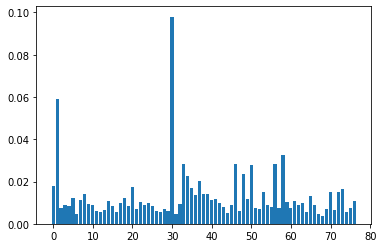

In [74]:
importance_RF = model1_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_RF):
    print(f'Feature: {i}, Score: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

#### Agin we see that the 2nd feature has significant importance although the most important feature in case of Random Forest Classifier is 30th

# Part 7

## Recursive Feature Elimination

In [50]:
from sklearn.feature_selection import RFECV
random_forest_new = RandomForestClassifier(max_depth=10, n_estimators=200)
selector = RFECV(estimator = random_forest_new,step =1, cv=5)
selector = selector.fit(train_X_norm, train_y)

In [51]:
selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True])

In [52]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1, 13,  1,  1,  1,  1,  9,  1,  1,  1,  2, 11,
        1,  1,  5,  1,  3,  1,  1,  1,  1,  4, 15,  1, 14,  1, 19,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  8, 16,  1,  1,  7,  1,  1,  1,
        1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,  1, 12,  1,  1, 17,
       18,  1,  1,  1,  1,  1, 10,  1,  1])

In [53]:
y_predict_RF = selector.predict(test_X_norm)
print(y_predict_RF)

[2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1.
 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2.
 1. 1. 1. 2. 1. 2. 2. 2. 1.]


In [63]:
performance_RF = roc_auc_score(test_y ,y_predict_RF)
print(f"ROC-AUC score: \n Without RFE: {performance_model1_RF}, \n With RFE: {performance_RF}")

ROC-AUC score: 
 Without RFE: 0.9838709677419355, 
 With RFE: 0.9919354838709677


#### Performance with Recursive Feature Elimination is better for Random Forest

In [67]:
elasticnet_new = SGDClassifier(loss='log',penalty='elasticnet',l1_ratio=0.35)
selector_EN = RFECV(estimator = elasticnet_new, step=1, cv=5)
selector_EN = selector.fit(train_X_norm, train_y)

In [68]:
selector_EN.support_

array([False,  True, False, False, False,  True, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False,  True])

In [69]:
selector_EN.ranking_

array([39,  1, 16,  9,  3,  1, 37,  1,  5, 31,  1, 35,  1, 24,  1,  1, 10,
       41,  1, 29,  1,  1,  1,  1,  1,  1, 14, 38,  1,  7,  1, 25,  1,  1,
        1, 27,  1,  1,  1,  1,  1,  1, 18,  1,  1, 22, 19,  1, 17,  4, 34,
       28, 32, 21,  1,  6,  8, 20,  1, 11, 30,  1, 15, 23, 40, 33,  1,  2,
       36, 26, 13,  1,  1,  1,  1, 12,  1])

In [70]:
y_predict_EN = selector.predict(test_X_norm)
print(y_predict_EN)

[2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1.
 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1.
 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2.
 1. 1. 1. 2. 1. 2. 2. 2. 1.]


In [71]:
performance_EN = roc_auc_score(test_y ,y_predict_EN)
print(f"ROC-AUC score: \n Without RFE: {performance_model1_EN}, \n With RFE: {performance_EN}")

ROC-AUC score: 
 Without RFE: 0.95675292449486, 
 With RFE: 0.9593229351293868


#### Although the difference is quite small but in Elastic net Logistic Regression also using RFE gives a better ROC-AUC score

# Part 8

### Reading Test Data

In [152]:
test_data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")

In [153]:
display(test_data)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


#### Similar to what was done above, features are chunked to keep only protiens and the rest 2 columns are removed

In [84]:
protiens_TEST = test_data.columns.values
protiens_TEST = protiens_TEST[0:77]
features_TEST = test_data[protiens_TEST].copy()
display(features_TEST)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


### Multivariate feature imputation

In [92]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer_TEST = IterativeImputer(max_iter = 30, random_state = 0)

imputer_TEST.fit(features_TEST)

imputed_features_TEST = pd.DataFrame(imputer_TEST.transform(np.array(features_TEST)))
display(imputed_features_TEST)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


### Correlation matrix for test data

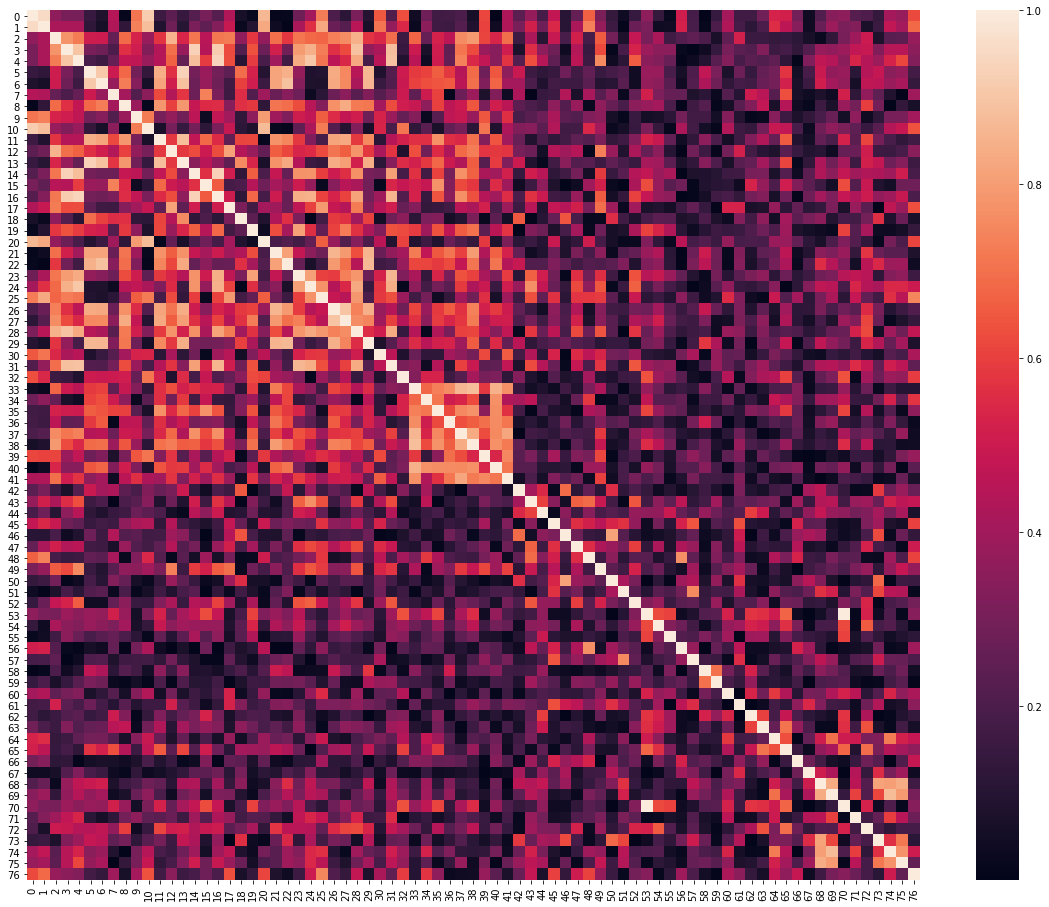

In [93]:
corrmat_TEST = imputed_features_TEST.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrmat_TEST), annot=False)
plt.show()

#### Encoding column names as numbers for data interpretation

In [94]:
elements_genotype_TEST = pd.unique(test_data['Genotype'])
encode_genotype_TEST = np.linspace(1, len(elements_genotype_TEST), num=len(elements_genotype_TEST))
print(elements_genotype_TEST)
print(encode_genotype_TEST)

['Control' 'Ts65Dn']
[1. 2.]


In [95]:
# Declaring a dataframe 'column_genotype' with only genotype data
column_genotype_TEST = pd.DataFrame(test_data['Genotype'])

# Encoding every row of column_genotype 
y_encoded_TEST = column_genotype_TEST.replace(elements_genotype_TEST, encode_genotype_TEST)

In [96]:
# Just for the sake of convinience
X_TEST = imputed_features_TEST.copy()
y_TEST = y_encoded_TEST

display(X_TEST)
display(y_TEST)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.121739,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.116850,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.108506,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.144687,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.140219,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


,Genotype
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
220,2.0
221,2.0
222,2.0
223,2.0


In [97]:
y_TEST = np.squeeze(y_TEST)
print(X_TEST.shape)
print(y_TEST.shape)

(225, 77)
(225,)


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_TEST)

# Normalization of data
X_norm_TEST = pd.DataFrame( scaler.transform(X_TEST) ) 

display(X_norm_TEST)

print(X_norm_TEST.mean())

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,1.100803,1.740822,2.583259,1.974701,2.394221,-0.582594,0.365164,-1.376292,0.822835,1.063762,...,-0.516397,-0.932169,-0.418205,2.198671,-0.483470,1.412221,-0.826137,-0.690252,-1.382332,1.208813
1,1.225392,1.779810,2.915630,2.144586,2.459251,-0.467399,0.462236,-1.332976,1.602315,1.480666,...,-0.142017,-0.706158,-0.008283,2.111312,-0.182021,1.207686,-0.712283,-0.574792,-1.481191,1.168194
2,1.189037,1.805485,3.009620,2.367066,2.407598,-0.413003,0.263538,-1.357593,1.595749,1.992142,...,0.037499,-1.025749,-0.502695,1.758871,-0.174812,0.969971,-0.801134,-0.642547,-1.649938,0.894561
3,0.788419,1.033239,1.595803,1.086687,2.278297,-0.106337,0.172848,-0.821312,0.149973,0.860422,...,-0.664581,-0.381114,-0.614801,1.515133,-0.230526,1.686461,-0.793853,-0.733683,-0.918278,1.327924
4,0.887416,1.290601,1.923244,1.501161,2.493537,0.022067,0.493524,-0.757459,0.423275,1.159789,...,-0.447700,-0.295291,0.514490,1.571069,-0.464649,1.326581,-0.551379,-0.205299,-1.008635,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.008066,-1.040136,-1.076567,-2.055177,-2.001432,-0.802076,-0.871643,-0.956547,-1.124435,-1.772423,...,1.798059,1.532977,1.130607,0.156378,0.026967,-0.475503,1.557361,0.947627,1.895954,-0.598727
221,-0.828023,-0.799506,-0.560376,-1.470007,-1.571760,-0.106214,0.041258,-0.655581,-0.581492,-1.381017,...,1.624208,1.058119,0.885559,-0.068511,-0.069003,-0.377369,1.563488,0.808837,1.210777,-0.677766
222,-1.064726,-1.196290,-1.205792,-2.411096,-2.134322,-0.600705,-0.783159,-1.219725,-1.200692,-1.907260,...,2.196109,1.832175,1.736455,-0.156688,0.482846,-0.059510,2.160862,1.463428,2.319775,-0.667209
223,-1.084540,-1.166913,-1.254841,-2.367244,-2.050418,-0.661345,-1.058192,-1.231263,-1.403294,-1.765824,...,1.843362,1.576438,1.997831,0.047974,0.708795,-0.540583,1.936344,1.438351,2.394040,-0.776149


0    -1.381611e-16
1     3.542845e-16
2     4.236118e-16
3    -3.641532e-16
4     3.118493e-16
          ...     
72   -7.201647e-16
73   -1.391480e-16
74    3.789561e-16
75   -2.111891e-16
76    3.468830e-16
Length: 77, dtype: float64


#### Same function are copied here just for the sake of reference

In [99]:
def grid_search_results(model, hyper_params, scoring, train_X, train_y, test_X, test_y):
    
    # perform 5 fold cross validation over alpha=0.1, 0.5
    clf = GridSearchCV(estimator = model, param_grid = hyper_params, scoring=scoring, cv=5)  
    
    clf.fit(train_X, train_y)
    print(f"Best parameters: \n {clf.best_params_}")
    print(f"Best score: {str(clf.best_score_)}")
    y_predict = clf.predict(test_X)
    print(f"Classification report: \n {classification_report(test_y, y_predict)}")
    print(f"Test ROC-AUC Score: {str(roc_auc_score(test_y, y_predict))}")

In [100]:
def trained_model(model, train_X, train_y, test_X, test_y, metric_for_test):
    model.fit(train_X, train_y)
    y_predict = model.predict(test_X)
    performance = metric_for_test(test_y, y_predict)
    return model, performance

#### All the models are tested below and compared on ROC-AUC score

### Elastic Net Logistic Regression

In [156]:
from sklearn.linear_model import SGDClassifier

model_EN_TEST, performance_model_EN_TEST = trained_model(SGDClassifier(loss='log',penalty='elasticnet',l1_ratio=0.5), train_X_norm, train_y, X_norm_TEST, y_TEST, roc_auc_score)

print(f"Model of Elastic net with l1:l2 ratio = 0.35 for MouseTest data has ROC-AUC score:{performance_model_EN_TEST}")

Model of Elastic net with l1:l2 ratio = 0.35 for MouseTest data has ROC-AUC score:0.8481481481481482


### Nueral Network

In [114]:
from sklearn.neural_network import MLPClassifier

model_NN_TEST, performance_model_NN_TEST = trained_model(MLPClassifier(random_state=1, max_iter=300, solver='lbfgs', hidden_layer_sizes=(20,)), train_X_norm, train_y, X_norm_TEST, y_TEST, roc_auc_score)

print(f"Model of Nueral Network with hidden layer size=20 for MouseTest data has ROC-AUC score:{performance_model1_NN}")

Model of Nueral Network with hidden layer size=20 for MouseTest data has ROC-AUC score:0.9945054945054945


### SVM

In [118]:
from sklearn.svm import SVC

model_SVM_TEST, performance_model_SVM_TEST = trained_model(SVC(kernel='rbf', C=10), train_X_norm, train_y, X_norm_TEST, y_TEST, roc_auc_score)

print(f"Model 1 of SVM with rbf kernel and C=10 for MouseTest data has ROC-AUC score:{performance_model_SVM_TEST}")

Model 1 of SVM with rbf kernel and C=10 for MouseTest data has ROC-AUC score:0.8111111111111111


### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

model_RF_TEST, performance_model_RF_TEST = trained_model(RandomForestClassifier(max_depth = 20, n_estimators=200), train_X_norm, train_y, X_norm_TEST, y_TEST, roc_auc_score)

print(f"Model of Random Forest Classifier with max depth=20, n_estimators=200 for MouseTest data has ROC-AUC score:{performance_model1_RF}")

Model of Random Forest Classifier with max depth=20, n_estimators=200 for MouseTest data has ROC-AUC score:0.9838709677419355


# Part 9

### Observations & Thoughts
1. The final order of accuracy of models based on ROC-AUC scores is Nueral Network > Random Forest > Elastic Net Logistic Regression > SVM. The order is almost the same just while training SVM showed greater accuracy than Elastic net
2. Using RFE increases the accuracy of the model as observed in part 7. This is due to huge contribution to loss by some features as seen in part 6 like 25th feature (index 24)
3. Overall 2nd Feature i.e the protien 'BDNF_N' is supposed to have great feature importance in all the models that were trained which can be seen from the graphs in part 6

# Part 10

### Refrences
1. Took some part of the code (like functions - 'grid_search_results' & 'trained_model' from code by last year EE 769 student H R Sai Sumedh EE BTech 180070024)
2. EE 769 slides, Amit Sethi Sir IITB
3. Links and references mentioned in assignment pdf
4. https://machinelearningmastery.com/calculate-feature-importance-with-python/
5. https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn